In [1]:
import pandas as pd
train = pd.read_csv(r"D:train4.csv",delimiter='|', encoding='utf-8')#panggil file
train=train.dropna()
list(train.columns.values)
sentiment_counts = train.label.value_counts()

print(sentiment_counts)

1    73091
0    73091
Name: label, dtype: int64


In [2]:
import pandas as pd
test = pd.read_csv(r"D:test4.csv",delimiter='|', encoding='utf-8')#panggil file
test=test.dropna()
list(test.columns.values)
sentiment_counts = test.label.value_counts()

print(sentiment_counts)

1    18201
0    18201
Name: label, dtype: int64


In [3]:
data = pd.concat([train, test])#gabung file


In [4]:
print('Processing text dataset')
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
import regex as re
from tqdm import tqdm


# setup tokenizer
tokenizer = WordPunctTokenizer()

vocab = Counter()

def text_to_wordlist(text):
    # Tokenize
    text = tokenizer.tokenize(text)
    
    # Return a list of words
    vocab.update(text)
    return text

def process_text(list_sentences):
    comments = []
    for text in tqdm(list_sentences):
        txt = text_to_wordlist(text)
        comments.append(txt)
    return comments


list_sentences_train = list(train["tweet_stem"].fillna("NAN_WORD").values)
list_sentences_test = list(test["tweet_stem"].fillna("NAN_WORD").values)
list_sentences= list(data["tweet_stem"].fillna("NAN_WORD").values)

#text_train = process_text(list_sentences_train)
#text_test = process_text(list_sentences_test)
text=process_text(list_sentences)

Processing text dataset


100%|██████████████████████████████████████████████████████████████████████| 182584/182584 [00:01<00:00, 109887.28it/s]


In [5]:

text1 = [sentence.lower() for sentence in list_sentences_train]
text2 = [sentence.lower() for sentence in list_sentences_test]

text3 = [sentence.lower() for sentence in list_sentences]
print(text3[3])

hahahaa tipu disalahin tipu tolol tangkap ratna susup jatuh prabowo


In [6]:
print((vocab))

Counter({'jokowi': 59209, 'prabowo': 40811, 'dukung': 16880, 'fitnah': 16461, 'rakyat': 15046, 'hoax': 15043, 'pilih': 14593, 'indonesia': 14518, 'presiden': 14247, 'orang': 13506, 'menang': 12797, 'cebong': 10230, 'sandi': 9321, 'akal': 8559, 'bohong': 8445, 'sehat': 8295, 'otak': 7652, 'kampret': 7475, 'pimpin': 7161, 'dungu': 6812, 'allah': 6452, 'curang': 6426, 'kampanye': 6403, 'negara': 6249, 'kerja': 5939, 'dgn': 5698, 'salah': 5656, 'bilang': 5473, 'udah': 5278, 'biar': 5202, 'tau': 5169, 'lawan': 5019, 'amin': 5012, 'koruptor': 4998, 'bukti': 4823, 'utk': 4715, 'hati': 4696, 'gak': 4495, 'kalah': 4390, 'hina': 4364, 'moga': 4252, 'april': 4205, 'bodoh': 4138, 'kubu': 4126, 'anak': 4057, 'suka': 3966, 'bikin': 3955, 'bangun': 3848, 'beliau': 3809, 'janji': 3697, 'emang': 3585, 'capres': 3540, 'bangsa': 3536, 'hasil': 3532, 'masyarakat': 3517, 'perintah': 3483, 'bang': 3481, 'suara': 3425, 'pilpres': 3371, 'maju': 3332, 'goblok': 3280, 'ulama': 3264, 'adil': 3217, 'ma': 3210, 'i

In [7]:
#PROSES WORD EMBEDDING
#import time
#import gensim

#start_time = time.time()
#word_model = gensim.models.Word2Vec(text, size=100, min_count=0, iter=10, sg=1) #0 CBOW, 1 Skripgram




#print("--- %s seconds ---" ,(time.time() - start_time))

In [8]:
#word_vectors = word_model.wv
#word_model.save('./skipgram6') #Save word embeeding

In [10]:
#Load Word embedding
import gensim
import time

start_time = time.time()
word_model_cbow = gensim.models.Word2Vec.load('./CBOW6')
word_vectors_cbow = word_model_cbow.wv
print("--- %s seconds ---" ,(time.time() - start_time))

--- %s seconds --- 1.1778512001037598


In [12]:
word_model_cbow.wv.most_similar_cosmul(positive=['provinsi'])#menampilkan hasil word embeeding


[('kabupaten', 0.9448193311691284),
 ('utara', 0.9290441274642944),
 ('selatan', 0.9243647456169128),
 ('kab', 0.9204432368278503),
 ('riau', 0.9193588495254517),
 ('sumatra', 0.9183428883552551),
 ('kalimantan', 0.915885865688324),
 ('hasundutan', 0.911843478679657),
 ('sulawesi', 0.9115939736366272),
 ('humbang', 0.9106057286262512)]

In [13]:
# more imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# how many features should the tokenizer extract
features = len(vocab)
tokenizer = Tokenizer(num_words = features)
# fit the tokenizer on our text
tokenizer.fit_on_texts(text3)

# get all words that the tokenizer knows
word_index = tokenizer.word_index

# put the tokens in a matrix
X = tokenizer.texts_to_sequences(text3)
X = pad_sequences(X)
X_test = tokenizer.texts_to_sequences(text2)
X_test = pad_sequences(X_test)
X_train = tokenizer.texts_to_sequences(text1)
X_train = pad_sequences(X_train)
# prepare the labels
#y_train = train.label
#y_test = test.label

In [14]:

# split in train and test
y=data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [16]:
# save the vectors in a new matrix
import numpy as np
embedding_matrix_cbow = np.zeros((len(word_model_cbow.wv.vocab) + 1, 100))
for i, vec_cbow in enumerate(word_model_cbow.wv.vectors):
    embedding_matrix_cbow[i] = vec_cbow

In [17]:
# save the vectors in a new matrix
import numpy as np
embedding_matrix_skipgram = np.zeros((len(word_model_skipgram.wv.vocab) + 1, 100))
for i, vec_skipgram in enumerate(word_model_skipgram.wv.vectors):
    embedding_matrix_skipgram[i] = vec_skipgram

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding,Dropout,LSTM

# init model
model = Sequential()
# emmbed word vectors
model.add(Embedding(len(word_model_cbow.wv.vocab)+1,100,input_length=X.shape[1],weights=[embedding_matrix_cbow+embedding_matrix_skipgram],trainable=False))
# learn the correlations
model.add(Dropout(0.2))
model.add(GRU(66,activation='relu',return_sequences=False))#menentukan GRU/LSTM dan jumlah neuron
model.add(Dense(1,activation="sigmoid"))
# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 98, 100)           8259800   
_________________________________________________________________
dropout (Dropout)            (None, 98, 100)           0         
_________________________________________________________________
gru (GRU)                    (None, 66)                33066     
_________________________________________________________________
dense (Dense)                (None, 1)                 67        
Total params: 8,292,933
Trainable params: 33,133
Non-trainable params: 8,259,800
_________________________________________________________________
Instructions for updating:
Use tf.wher

In [36]:
#start training
batch = 32
epochs = 10
#history=model.fit(X_train,y_train,batch,epochs,validation_data=(X_test,y_test))
history=model.fit(X_train,y_train,batch,epochs,validation_split=0.25)

Train on 109550 samples, validate on 36517 samples
Epoch 1/10
109550/109550 [==============================] - 311s 3ms/sample - loss: 0.2974 - acc: 0.9015 - val_loss: 0.2271 - val_acc: 0.9322
Epoch 2/10
109550/109550 [==============================] - 312s 3ms/sample - loss: 0.2354 - acc: 0.9296 - val_loss: 0.2170 - val_acc: 0.9377
Epoch 3/10
109550/109550 [==============================] - 313s 3ms/sample - loss: 0.2228 - acc: 0.9335 - val_loss: 0.2085 - val_acc: 0.9408
Epoch 4/10
109550/109550 [==============================] - 312s 3ms/sample - loss: 0.2168 - acc: 0.9357 - val_loss: 0.2064 - val_acc: 0.9412
Epoch 5/10
109550/109550 [==============================] - 313s 3ms/sample - loss: 0.2135 - acc: 0.9357 - val_loss: 0.2039 - val_acc: 0.9418
Epoch 6/10
109550/109550 [==============================] - 313s 3ms/sample - loss: 0.2076 - acc: 0.9380 - val_loss: 0.2014 - val_acc: 0.9423
Epoch 7/10
109550/109550 [==============================] - 313s 3ms/sample - loss: 0.2051 - acc:

In [37]:
model.save("gru_mix66drop02.h5")        #save model

In [38]:

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


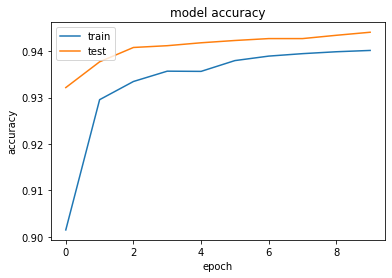

In [39]:
#summarize history for accuracy
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


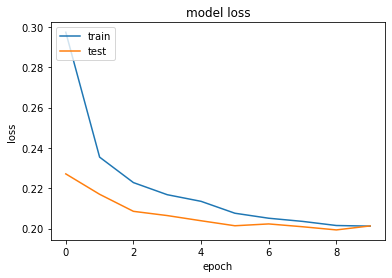

In [40]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('lstm_skipgramverr8drop05.h5')
# summarize model.
#model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.945067
Precision: 0.908511
Recall: 0.989813
F1 score: 0.947421
Cohens kappa: 0.890133
ROC AUC: 0.951544
[[16438  1820]
 [  186 18073]]


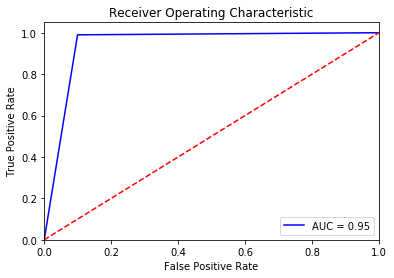

In [42]:
#ROC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat_classes)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
#uji model
r=["prabowo bangun infrastruktur","buang sampah pada tempat","prabowo dungu","punya otak","tidak punya otak"
   ,"pendukung prabowo sampah masyarakat","kampret cebong goblok","jobowi temu raja salman","jobowi temu raja hoax",
  "ma jokowi keliling koruptor ogah pilih"]
#r=test.tweet_stem.tolist()


# get all words that the tokenizer knows
word_index = tokenizer.word_index

X4 = tokenizer.texts_to_sequences(r)
X4 = pad_sequences(X4,maxlen=X.shape[1])

In [47]:
yhat_probs =model.predict_classes(X4, verbose=0)

In [48]:
print(yhat_probs)

[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [45]:
#uji model denga data test
for i in range(len(test)):
    if(yhat_probs[i]==0 and test.label[i]==1):
        print(r[i],"|",yhat_probs[i],"|",test.label[i])

kamprettt kesasar | [0] | 1
najis njingg penjilatt | [0] | 1
golput ngajak orang kampreeett jokowi presiden | [0] | 1
ojek online sekitar ibukota kota indonesia butuh pesimis gblk | [0] | 1
gblk bngt nnti serang anak anak jokowi | [0] | 1
iba sby harga prabowo rakyat harga beliau pimpin bangsa laku bangsa anak buah marah bosny | [0] | 1
sampah hoax mulu kiani clear yaa insyallah sbntr lg pimpin fresh smart indonesia adil makmur ken makmur | [0] | 1
baca kamprettt laku junjung jurnalis | [0] | 1
hahahha bohongggggggg wiwi hahahah | [0] | 1
mnrt sindir presiden jkwi presiden baik terrhebat maksud mata dukung mata rakyat terrburuk gitu dapat hati wktu dbt | [0] | 1
negara maju maju presiden gblk | [0] | 1
ntah temen dukung prabowo mikirnya kerja tiongkok trus jajah wna keluarga tki negeri karep njing | [0] | 1
goblokk arap sempet kesel mobel entod bahas | [0] | 1
simpel sbnrnya liat jakarta kota pimpin pimpin bener pas ganti modal bacot alam mimpin bener jokowi emng kurang ganti prabowo k